# PREDICT HOUSE PRICES FOR HOUSE SALES IN KING COUNTRY USA DATASET

BY : PORTFOLIO PROJEK BY: ALDI HANIF MUSLIM

# 1. Data Understanding & Business Understanding 
Dataset ini berisi harga jual rumah untuk King County, yang mencakup Seattle. Ini termasuk rumah yang dijual antara Mei 1900 dan Mei 2015. Ini adalah kumpulan data yang bagus untuk mengevaluasi model regresi sederhana.

Dataset ini memiliki 21 attributes, diantaranya sebagai berikut :

* id : A notation for a house
* date: Date house was sold
* price: Price is prediction target
* bedrooms: Number of bedrooms
* bathrooms: Number of bathrooms
* sqft_living: Square footage of the home
* sqft_lot: Square footage of the lot
* floors :Total floors (levels) in house
* waterfront :House which has a view to a waterfront
* view: Has been viewed
* condition :How good the condition is overall
* grade: overall grade given to the housing unit, based on King County grading system
* sqft_above : Square footage of house apart from basement
* sqft_basement: Square footage of the basement
* yr_built : Built Year
* yr_renovated : Year when house was renovated
* zipcode: Zip code
* lat: Latitude coordinate
* long: Longitude coordinate
* sqft_living15 : Living room area in 2015(implies-- some renovations) This might or might not have affected the lotsize area
* sqft_lot15 : LotSize area in 2015(implies-- some renovations)

## Objectives of Notebook 
**Pembahasan notebook ini bertujuan untuk:**
*   Mengexplore dan preprocess dataset untuk model regresi.
*   Membangun model regresi linear dan model ridge dengan beberapa experiment berbeda.

**Model pembelajaran mesin yang digunakan dalam project ini adalah::** 
1. Linear Regression
2. Ridge Regression

## Data Set Description 
Ada **21 variabel** dalam kumpulan data ini:
* **2 variabel kategori**,
* **17 variabel kontinu**,
* **1** variabel untuk menyimpan ID rumah, dan
* **1** variabel untuk menyimpan tanggal rumah terjual.

# 2. Importing Libraries 
Mengimpor library yang akan digunakan di notebook ini.

In [3]:
# Import Library yang dibutuhkan
# Data cleaning and manipulation 
import numpy as np
import pandas as pd

# data visualization
%matplotlib inline
import matplotlib.pyplot as plt

import seaborn as sns
color = sns.color_palette()
sns.set_style('darkgrid')

import warnings

# machine learning
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

# 3. Reading Data Set 
Setelah mengimpor library, kita juga akan mengimpor dataset yang akan digunakan.

In [4]:
# Mendefinisikan link dataset
raw_data = pd.read_csv("../input/housesalesprediction/kc_house_data.csv")

# Mengeprint kolom dataset
print(raw_data.columns)

# Menampilkan 5 data teratas
raw_data.head()

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')


,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [5]:
# Menampilkan dimensi dataset
raw_data.shape

(21613, 21)

# 4. Checking Null Values 

In [6]:
# Menampilkan informasi detail tentang dataframe
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [7]:
# Memeriksa jumlah missing value pada dataset
raw_data.isnull().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

Dapat dilihat tidak terdapat missing values dari dataset yang digunakan.

# 5. Data Exploration 
Pada bagian ini akan melakukan eksplorasi data dari kumpulan data.

## 5.1 Heatmap dan Plotting Pairwise
Matrixplot merupakan plot yang berbentuk matrix umumnya digunakan **untuk melihat korelasi antar variabel**. Untuk menggunakan matrixplot() pertama kita harus cari korelasi antar atribut data dengan fungsi corr() dari hasil korelasi kita dapat membuat matrixplot untuk melihat data lebih dalam misalnya korelasi bisa dilihat dari perbedaan atau kedalaman warna.

Disini kita gunakan argumen **annot=True** untuk menampilkan korelasi antar atribut. `Jika nilai korelasi mendekati 1 maka hubungan antar atribut semakin tinggi.`

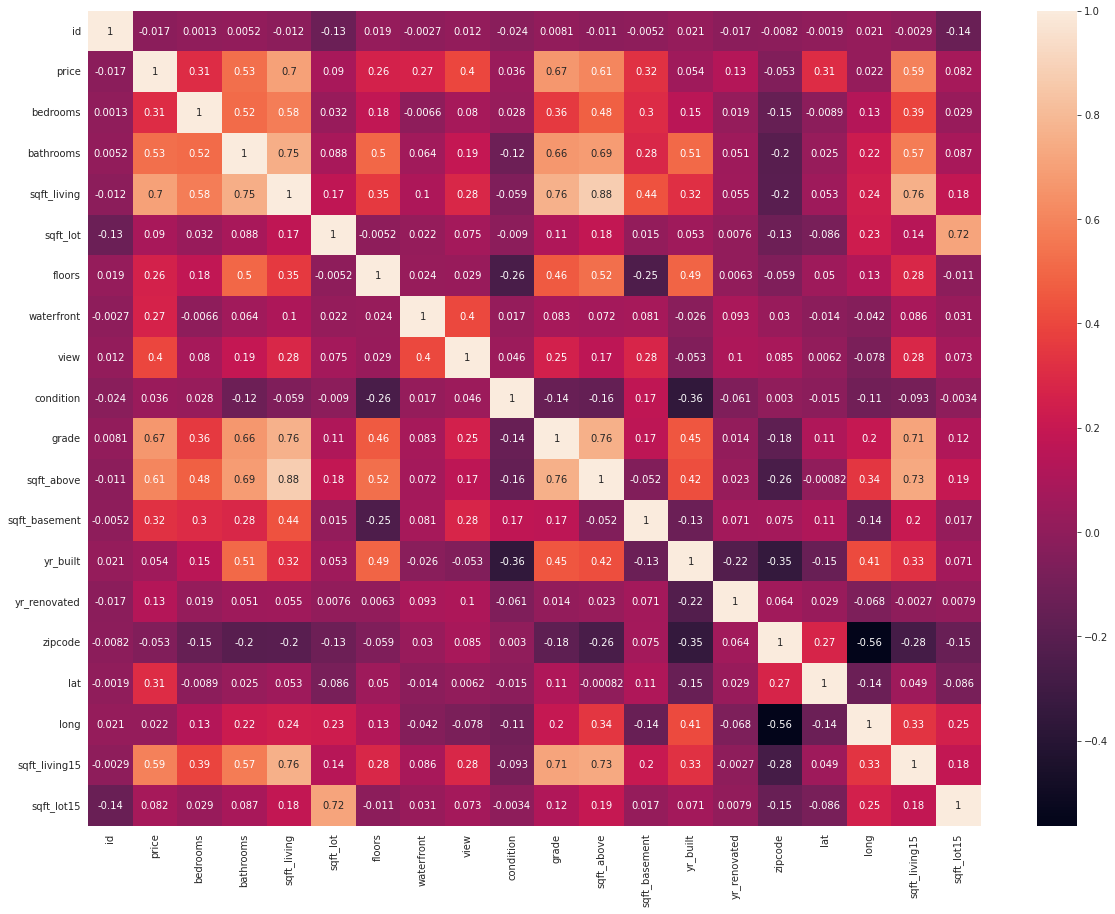

In [8]:
# Menampilkan heatmap dari dataset
cormap = raw_data.corr()
plt.figure(figsize=(20,15))
sns.heatmap(cormap, annot=True)
plt.show()

## 5.2 Describing Dataset 
Output di bawah akan menampilkan informasi berikut untuk setiap kolom atau fitur.
* count - Jumlah nilai yang tidak kosong.
* mean - Nilai rata-rata (rata-rata).
* std - Standar deviasi.
* min - nilai minimum.
* 25% - Persentil 25%*.
* 50% - Persentil 50%*.
* 75% - Persentil 75%*.
* maks - nilai maksimum.

In [9]:
# Menampilkan deskriptif statistik data
raw_data.describe(percentiles=[])

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


# 6. Data Preprocessing 
Data preprocessing adalah proses yang mengubah data mentah ke dalam bentuk yang lebih mudah dipahami. Data yang sesuai akan dikumpulkan, dibersihkan, dan diatur sesuai dengan kebutuhan bisnis. Sehingga data yang akan diolah nantinya sudah tidak mengandung missing value, outliers, duplikasi, dst.

## 6.1 Dropping Columns & Set Target 
Pada bagian ini kita akan **men-drop id column** dikarenakan nilainya unik dan memiliki nilai korelasi rendah dengan price.

In [10]:
# Drop id column
data = raw_data.drop(['id', 'zipcode'], axis = 1)
target = data['price']
data = data.drop(['price'], axis = 1)
data.head()

,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15
0,20141013T000000,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,47.5112,-122.257,1340,5650
1,20141209T000000,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,47.7210,-122.319,1690,7639
2,20150225T000000,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,47.7379,-122.233,2720,8062
3,20141209T000000,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,47.5208,-122.393,1360,5000
4,20150218T000000,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,47.6168,-122.045,1800,7503


## 6.2 Transform Date Column 
Mengubah kolom tanggal menjadi **year, month, and day**

In [11]:
# Mengubah kolom tanggal
data['date'] = pd.to_datetime(data['date'])
data['year'] = data['date'].dt.year
data['month'] = data['date'].dt.month
data['day'] = data['date'].dt.day

data = data.drop("date",axis=1)

data.head()

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15,year,month,day
0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,47.5112,-122.257,1340,5650,2014,10,13
1,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,47.7210,-122.319,1690,7639,2014,12,9
2,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,47.7379,-122.233,2720,8062,2015,2,25
3,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,47.5208,-122.393,1360,5000,2014,12,9
4,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,47.6168,-122.045,1800,7503,2015,2,18


## 6.3 Data Cleansing and Preparation

In [12]:
# Mengubah nilai outliers 33 menjadi 3
data['bedrooms'] = data['bedrooms'].replace(33, 3)

In [13]:
# Merubah tipe data dari feature bathrooms yang awalnya float menjadi int
data['bathrooms'] = data['bathrooms'].astype('int')

## 6.4 Splitting Dataset 
Dataset ini akan dibagi menjadi **80% train and 20% test**.

In [14]:
# Mensplit data menjadi training dan testing dengan porsi 80:20
X_train, X_test, y_train, y_test = \
    train_test_split(data, target, random_state=42, train_size=0.8, shuffle=True)
print ("train size={}, test_size={}, total_size={}".format(
    X_train.shape[0], X_test.shape[0], data.shape[0])
)

train size=17290, test_size=4323, total_size=21613


# 7. Models 
Pada langkah ini akan mengembangkan model regresi linear dan ridge dengan percobaan yang berbeda.

## 7.1 Linear Regression
Merupakan jenis analisis regresi yang paling umum digunakan. Pada tipe ini, variabel dependen bersifat kontinu, sedangkan variabel independen bisa bersifat kontinu atau diskrit (terpisah). Untuk sifat garis regresinya sendiri bersifat linier. Dalam linear regression, hubungan antara variabel dependen (Y) dengan satu atau lebih variabel independen (X) menggunakan garis lurus yang paling sesuai (garis regresi).

In [15]:
# Mengimport library LinierRegression
from sklearn.linear_model import LinearRegression

# Melakukan Linier Regression tanpa Normalisasi Data
model_LR = LinearRegression(normalize=False)
model_LR.fit(X_train, y_train)
print("num_ftrs = {}, num_coeff = {} ".format(X_train.shape[1], len(model_LR.coef_)))
reg_coeff = dict(zip(data.columns, model_LR.coef_))
print(reg_coeff)

num_ftrs = 20, num_coeff = 20 
{'bedrooms': -36570.85491530107, 'bathrooms': 55052.79050729444, 'sqft_living': 107.8265633675848, 'sqft_lot': 0.071855257951004, 'floors': -144.84100753639575, 'waterfront': 569119.599880194, 'view': 49684.386519505424, 'condition': 31410.045756033982, 'grade': 95675.35688281147, 'sqft_above': 69.01860646667483, 'sqft_basement': 38.807957164439706, 'yr_built': -2480.0198984054045, 'yr_renovated': 22.66357754781327, 'lat': 557316.7803038334, 'long': -96625.56120970674, 'sqft_living15': 28.50949537847355, 'sqft_lot15': -0.3355799463350351, 'year': 36779.46285498134, 'month': 1310.1748140637806, 'day': -344.47148975193966}


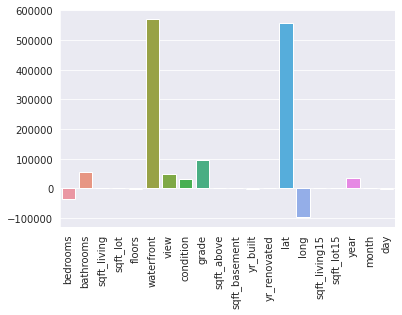

In [16]:
y_pred_train = model_LR.predict(X_train)
y_pred = model_LR.predict(X_test)

sns.barplot(x = X_train.columns, y=model_LR.coef_)
plt.xticks(rotation=90);

**Root Mean Squared Error (RMSE)** adalah akar dari Rata-rata Kesalahan kuadrat diantara nilai aktual dan nilai peramalan. Metode Root Mean Squared Error secara umum digunakan untuk mengecek estimasi berapa nilai kesalahan pada peramalan. `Nilai Mean Squared Error yang semakin rendah menunjukkan bahwa hasil peramalan semakin sesuai` dengan data aktual dan bisa dijadikan untuk perhitungan peramalan di periode mendatang.

**Mean Absolute Error** adalah rata-rata selisih mutlak nilai sebenarnya (aktual) dengan nilai prediksi (peramalan). `MAE digunakan untuk mengukur keakuratan suatu model statistik dalam melakukan prediksi atau peramalan.`

In [17]:
print('MAE:', mean_absolute_error(y_test, y_pred))
print('RMSE:', np.sqrt(mean_squared_error(y_test, y_pred)))
print('R2 Score:', r2_score(y_test, y_pred))

MAE: 127769.80142958782
RMSE: 213558.07408486507
R2 Score: 0.6983196001157366


In [18]:
results= pd.DataFrame(columns=['MAE','RMSE','R2-score'])
results.loc['Linear Regression']=[mean_absolute_error(y_test,y_pred),mean_squared_error(y_test, y_pred, squared=False),r2_score(y_test,y_pred)]

## 7.2 Linear Regression dengan Normalization
Tujuan normalisasi data yaitu untu mengubah fitur menjadi skala yang sama. yang akan meningkatkan kinerja dan stabilitas pelatihan model. Serta untuk menghilang kerangkapan data, mengurangi kompleksitas, dan mempermudah pemodifikasian data.

### 7.2.1 Normalization technique 

In [19]:
# Menormalisasi data menggunakan StandardScaler (Scaling)
from sklearn.preprocessing import StandardScaler
X_train_scale = pd.DataFrame(StandardScaler().fit_transform(X_train), columns = X_train.columns)
X_train_scale.set_index(X_train.index, inplace = True)
X_test_scale = pd.DataFrame(StandardScaler().fit_transform(X_test), columns = X_test.columns)
X_test_scale.set_index(X_test.index, inplace = True)

In [20]:
X_train_scale.mean()

bedrooms         3.190045e-17
bathrooms       -6.472555e-17
sqft_living     -1.800500e-16
sqft_lot        -2.383544e-17
floors           2.434914e-17
waterfront       2.342449e-17
view            -2.999978e-17
condition        3.279428e-16
grade           -2.473954e-16
sqft_above      -1.173279e-16
sqft_basement   -5.270509e-17
yr_built        -5.178044e-16
yr_renovated     4.561610e-17
lat             -1.586865e-14
long             3.110535e-14
sqft_living15   -3.739699e-17
sqft_lot15       2.424640e-17
year            -1.969250e-13
month           -1.068485e-17
day              1.664371e-17
dtype: float64

### 7.2.2 Linier Regression dengan Normalisasi Data

In [21]:
model_norm = LinearRegression(normalize=True)
model_norm.fit(X_train_scale, y_train)

LinearRegression(normalize=True)

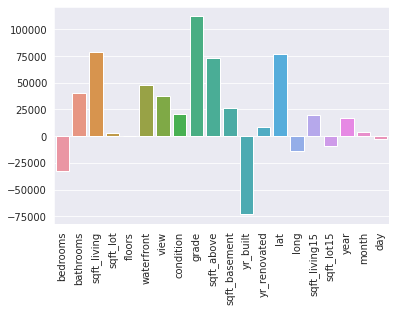

In [22]:
y_pred_train = model_norm.predict(X_train_scale)
y_pred = model_norm.predict(X_test_scale)

sns.barplot(x = X_train_scale.columns, y=model_norm.coef_)
plt.xticks(rotation=90);

In [23]:
print('MAE:', mean_absolute_error(y_test, y_pred))
print('RMSE:', np.sqrt(mean_squared_error(y_test, y_pred)))
print('R2 Score:', r2_score(y_test, y_pred))

MAE: 125651.89554029643
RMSE: 214741.23043825018
R2 Score: 0.6949675954601786


In [24]:
results.loc['Linear Regression Normalized']=[mean_absolute_error(y_test,y_pred),mean_squared_error(y_test, y_pred, squared=False),r2_score(y_test,y_pred)]

## 7.3 Ridge Regression
Ridge regression digunakan saat data mengalami multikolinearitas atau variabel independen yang sangat berkorelasi.

In [25]:
from sklearn.linear_model import Ridge

ridge_model = Ridge(alpha=0.5)
ridge_model.fit(X_train_scale, y_train)

Ridge(alpha=0.5)

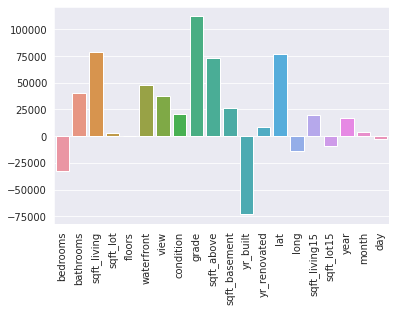

In [26]:
y_pred_train = ridge_model.predict(X_train_scale)
y_pred = ridge_model.predict(X_test_scale)

sns.barplot(x = X_train_scale.columns, y=ridge_model.coef_)
plt.xticks(rotation=90);

In [27]:
print('MAE:', mean_absolute_error(y_test, y_pred))
print('RMSE:', np.sqrt(mean_squared_error(y_test, y_pred)))
print('R2 Score:', r2_score(y_test, y_pred))

MAE: 125650.99344933218
RMSE: 214741.56542958535
R2 Score: 0.6949666437724942


In [28]:
results.loc['Ridge']=[mean_absolute_error(y_test,y_pred),mean_squared_error(y_test, y_pred, squared=False),r2_score(y_test,y_pred)]

# 8. Model Comparison 

In [29]:
results.sort_values('R2-score',ascending=False).style.background_gradient(cmap='Reds',subset=['R2-score'])

,MAE,RMSE,R2-score
Linear Regression,127769.801430,213558.074085,0.698320
Linear Regression Normalized,125651.895540,214741.230438,0.694968
Ridge,125650.993449,214741.565430,0.694967


Dapat dilihat bahwa **Linear Regression memiliki R2-Score paling besar (mendekati 1)** dibandingkan dengan Ridge Regression dan eksperimen Linear Regression lainnya.

# 9. House Prediction

Cinda ingin membeli rumah di daerah King Country USA, dengan beberapa kriteria sebagai berikut:
* bedrooms: 3
* bathrooms: 2
* sqft_living:1800
* sqft_lot: 4500
* floors : 2
* waterfront :0
* view: 0
* condition :4
* grade: 8
* sqft_above : 750
* sqft_basement: 900
* yr_built : 1995
* yr_renovated : 0
* lat: 47
* long: -122
* sqft_living15 : 1700
* sqft_lot15 : 6000
* year : 2015
* month : 12
* day : 3
Prediksikan berapa harga rumah idaman Cinda dengan kriteria-kriteria tersebut!

In [30]:
# Prediction Test
model_LR.predict([[3,2,1800,4500,2,0,0,4,8,750,900,1995,0,47,-122,1700,6000,2015,12,3]])

array([159499.01208653])